<h1 align=center>Exploring Neighborhoods of Mumbai for Starting Café</h1>

<h2><b>Introduction</b></h2>

Mumbai is one of the busiest metropolitan in India,being the financial capital and one of the densely populated City. Due to multiple iconic spots, Mumbai is a major tourist attraction every year. I have been working in Mumbai for a while now and have unique experience with the neighborhoods. It is one of the major IT hub and everyday thousands of professionals prefer business meetups in Café. This is a everyday delimma faced by IT professional like myself to actually find a place to carry out small tasks like sending mails, making calls without background disturbance or grabbing a coffee between a hectic day. Thus, the aim of this project is to study the neighborhoods in Mumbai to determine possible locations for starting a Café . This project can be useful for business owners and entrepreneurs who are looking to invest in a Café in Mumbai. The main objective of this project is to carefully analyze appropriate data and find recommendations for the stakeholders.

<h2><b>Data Collection</b></h2>

For this project we need the following data:

### Neighborhoods Data
The data of the neighborhoods in Mumbai was scraped from https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai. The data is read into a pandas data frame using the read_html() method. The main reason for doing so is that the Wikipedia page provides a comprehensive and detailed table of the data which can easily be scraped using the read_html() method of pandas.

### Geographical Coordinates
The geographical coordinates for Mumbai data has been obtained from the GeoPy library in python. This data is relevant for plotting the map of Mumbai using the Folium library in python. The geocoder library in python has been used to obtain latitude and longitude data for various neighborhoods in Mumbai. The coordinates of all neighborhoods in Mumbai are used to check the accuracy of coordinates given on Wikipedia and replace them in our data frame if the absolute difference is more than 0.001. These coordinates are then further used for plotting using the Folium library in python.

### Venue Data
The venue data has been extracted using the Foursquare API. This data contains venue recommendations for all neighborhoods in Mumbai and is used to study the popular venues of different neighborhoods.

<b>We start by Importing all the required libraries</b>

In [4]:
!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score

%matplotlib notebook

print('All libraries imported.')

     |████████████████████████████████| 98 kB 8.4 MB/s  eta 0:00:01
     |████████████████████████████████| 94 kB 4.8 MB/s  eta 0:00:01
All libraries imported.


<h2>Data Fetching</h2>

Data Scrapped from https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai and using pandas to read data in dataframe

In [5]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai')[-1]
df.rename(columns={'Area': 'Neighborhood'}, inplace=True)
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


<h2>Wrangling the Data</h2>

Looking up the different values for Location present in the Location column.

In [6]:
df['Location'].value_counts()

South Mumbai                       30
Andheri,Western Suburbs             8
Western Suburbs                     6
Eastern Suburbs                     4
Bandra,Western Suburbs              3
Mira-Bhayandar,Western Suburbs      3
Ghatkopar,Eastern Suburbs           3
Kandivali West,Western Suburbs      3
Powai,Eastern Suburbs               3
Borivali (West),Western Suburbs     2
Goregaon,Western Suburbs            2
Mumbai                              2
Kalbadevi,South Mumbai              2
Khar,Western Suburbs                2
Malad,Western Suburbs               2
Vasai,Western Suburbs               2
Harbour Suburbs                     2
Mulund,Eastern Suburbs              1
Kurla,Eastern Suburbs               1
Kandivali East,Western Suburbs      1
Vile Parle,Western Suburbs          1
Govandi,Harbour Suburbs             1
Colaba,South Mumbai                 1
Tardeo,South Mumbai                 1
Fort,South Mumbai                   1
Sanctacruz,Western Suburbs          1
Kamathipura,

We can see that there are many locations that appear only once or twice. This is because the main locations like "Western Suburbs" or "South Mumbai" are being further divided by the area within these locations. Lets clean the Location column to make it easier to understand.

In [7]:
df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1])
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
5,Marol,Western Suburbs,19.119219,72.882743
6,Sahar,Western Suburbs,19.098889,72.867222
7,Seven Bungalows,Western Suburbs,19.129052,72.817018
8,Versova,Western Suburbs,19.120000,72.820000
9,Mira Road,Western Suburbs,19.284167,72.871111


Let's look at the values in Location coloumn

In [8]:
df['Location'].value_counts()

South Mumbai       39
Western Suburbs    36
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
Name: Location, dtype: int64

Let's display the dataframe created

In [9]:
df

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
...,...,...,...,...
88,Parel,South Mumbai,18.990000,72.840000
89,Gowalia Tank,South Mumbai,18.962450,72.809703
90,Dava Bazaar,South Mumbai,18.946882,72.831362
91,Dharavi,Mumbai,19.040208,72.850850


We can reconfirm these coordinates using Geocoder.

In [10]:
df['Latitude1'] = None
df['Longitude1'] = None

for i, neigh in enumerate(df['Neighborhood']):
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Mumbai, India'.format(neigh))
        lat_lng_coords = g.latlng
    
    if lat_lng_coords:
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
    
    df.loc[i, 'Latitude1'] = latitude
    df.loc[i, 'Longitude1'] = longitude

df.head(10)
print("done")

done


We can create new columns to see the difference. We will take the absolute difference between coordinate values obtained from wikipedia and those obtained from geocodervalues and store them in our dataframe.

In [11]:
df['Latdiff'] = abs(df['Latitude'] - df['Latitude1'])
df['Longdiff'] = abs(df['Longitude'] - df['Longitude1'])
df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.129300,72.843400,19.1291,72.8464,0.00024,0.00304
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,19.1084,72.8623,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,19.1251,72.8325,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.124714,72.827210,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.130815,72.829270,19.1432,72.8249,0.012345,0.0044
5,Marol,Western Suburbs,19.119219,72.882743,19.1191,72.8828,0.000169,6.7e-05
6,Sahar,Western Suburbs,19.098889,72.867222,19.1027,72.8626,0.00376476,0.00464166
7,Seven Bungalows,Western Suburbs,19.129052,72.817018,19.1286,72.8212,0.000492,0.004162
8,Versova,Western Suburbs,19.120000,72.820000,19.1377,72.8135,0.01769,0.00652
9,Mira Road,Western Suburbs,19.284167,72.871111,19.2657,72.8707,0.0184624,0.000418149


We will replace the values with the coordinates obtained from geocoder if the absolute difference is more than 0.001.

In [12]:
df.loc[df.Latdiff>0.001, 'Latitude'] = df.loc[df.Latdiff>0.001, 'Latitude1']
df.loc[df.Longdiff>0.001, 'Longitude'] = df.loc[df.Longdiff>0.001, 'Longitude1']
df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.1293,72.8464,19.1291,72.8464,0.00024,0.00304
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623,19.1084,72.8623,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.1241,72.8325,19.1251,72.8325,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.1264,72.8242,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.1432,72.8249,19.1432,72.8249,0.012345,0.0044
5,Marol,Western Suburbs,19.1192,72.8827,19.1191,72.8828,0.000169,6.7e-05
6,Sahar,Western Suburbs,19.1027,72.8626,19.1027,72.8626,0.00376476,0.00464166
7,Seven Bungalows,Western Suburbs,19.1291,72.8212,19.1286,72.8212,0.000492,0.004162
8,Versova,Western Suburbs,19.1377,72.8135,19.1377,72.8135,0.01769,0.00652
9,Mira Road,Western Suburbs,19.2657,72.8711,19.2657,72.8707,0.0184624,0.000418149


In order to confirm if values have actually been replaced we can use the where method. Values with NaN means those values have not been replaced

In [13]:
df.where(df['Latitude']==df['Latitude1'])

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623,19.1084,72.8623,0.003028,0.001497
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Four Bungalows,Western Suburbs,19.1264,72.8242,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.1432,72.8249,19.1432,72.8249,0.012345,0.0044
...,...,...,...,...,...,...,...,...
88,Parel,South Mumbai,18.9957,72.84,18.9957,72.8391,0.0057,0.00087
89,Gowalia Tank,South Mumbai,18.9645,72.8112,18.9645,72.8112,0.00201,0.001467
90,Dava Bazaar,South Mumbai,19.1314,72.927,19.1314,72.927,0.184518,0.095598
91,Dharavi,Mumbai,19.0467,72.8546,19.0467,72.8546,0.006532,0.00376


Repeating previous step with Longitude

In [14]:
df.where(df['Longitude']==df['Longitude1'])

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.1293,72.8464,19.1291,72.8464,0.00024,0.00304
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623,19.1084,72.8623,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.1241,72.8325,19.1251,72.8325,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.1264,72.8242,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.1432,72.8249,19.1432,72.8249,0.012345,0.0044
...,...,...,...,...,...,...,...,...
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,Gowalia Tank,South Mumbai,18.9645,72.8112,18.9645,72.8112,0.00201,0.001467
90,Dava Bazaar,South Mumbai,19.1314,72.927,19.1314,72.927,0.184518,0.095598
91,Dharavi,Mumbai,19.0467,72.8546,19.0467,72.8546,0.006532,0.00376


As a finishing touch let's drop columns not usefull for our analysis

In [15]:
df.drop(['Latitude1', 'Longitude1', 'Latdiff', 'Longdiff'], axis=1, inplace=True)
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.1293,72.8464
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623
2,D.N. Nagar,Western Suburbs,19.1241,72.8325
3,Four Bungalows,Western Suburbs,19.1264,72.8242
4,Lokhandwala,Western Suburbs,19.1432,72.8249
5,Marol,Western Suburbs,19.1192,72.8827
6,Sahar,Western Suburbs,19.1027,72.8626
7,Seven Bungalows,Western Suburbs,19.1291,72.8212
8,Versova,Western Suburbs,19.1377,72.8135
9,Mira Road,Western Suburbs,19.2657,72.8711


<h2>Visualization</h2>

Let's see how many neighbors are there location wise for a better understanding

In [16]:
neighborhoods_mumbai = df.groupby('Location')['Neighborhood'].nunique()
neighborhoods_mumbai

Location
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
South Mumbai       39
Western Suburbs    36
Name: Neighborhood, dtype: int64

Let's quickly plot to get a visual of this data

<IPython.core.display.Javascript object>


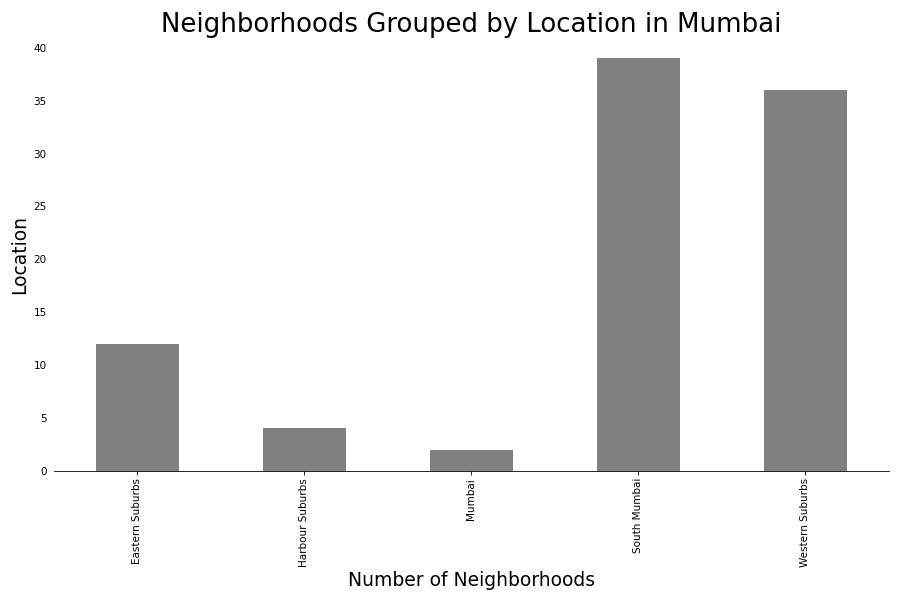

In [18]:
fig = plt.figure(figsize=(12,8))

ax = neighborhoods_mumbai.plot(kind='bar', color='grey')
ax.set_title('Neighborhoods Grouped by Location in Mumbai', fontsize=25)
ax.set_xlabel('Number of Neighborhoods', fontsize=18)
ax.set_ylabel('Location', fontsize=18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(which='major', left=False)

fig.tight_layout()

For sure South Mumbai and Western Suburbs have the most number of neighborhoods. But why Mumbai itself? This is because the neighborhoods contained in this location are located at the outskirts of Mumbai and thus have been grouped as just Mumbai.

Lets visualize the neighborhoods on a map using Folium. First we will obtain the geographical coordinates of Mumbai using GeoPy.

In [19]:
address = 'Mumbai, IN'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Mumbai are {}, {}.'.format(latitude, longitude))

ConfigurationError: Using Nominatim with default or sample `user_agent` "geopy/2.0.0" is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`.

In [26]:
map_mum = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, location, neighborhood in zip(df['Latitude'], df['Longitude'], df['Location'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.4,
        parse_html=False).add_to(map_mum)  
    
map_mum

<h2>Using Foursquare API</h2>

Let's use Foursquare API to fetch venue recommendation

Creating Foursquare Credentials:

In [27]:
CLIENT_ID = 'MH4VWWE0FJVZI102MJ0FLDVASUUY5MPZGEDBAYPMKCUX5DGE' # your Foursquare ID
CLIENT_SECRET = 'RCZY2CR3USIDA3YEYXCTNCEIDOESQGATJ5QCBJTO15XSYOG1' # your Foursquare Secret
VERSION = '20181201' # Foursquare API version

In [28]:
neighborhood_name = df.loc[5, 'Neighborhood']
neighborhood_lat = df.loc[5, 'Latitude']
neighborhood_long = df.loc[5, 'Longitude']

print("The neighborhood is {} and it's geographical coordinates are {} latitude and {} longitude".format(neighborhood_name,
                                                                                                        neighborhood_lat, neighborhood_long))

The neighborhood is Marol and it's geographical coordinates are 19.119219 latitude and 72.882743 longitude


We will now extract the top 200 venues near Marol with a radius of 1000m or 1km. In order to do this, we will start by creating a url.

In [29]:
LIMIT = 200
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_lat, 
    neighborhood_long, 
    radius, 
    LIMIT)

Using GET method to fetch results:

In [30]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '605704a8e5205c5089bd7679'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Jogeshwari East',
  'headerFullLocation': 'Jogeshwari East, Mumbai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 17,
  'suggestedBounds': {'ne': {'lat': 19.12821900900001,
    'lng': 72.89225065581734},
   'sw': {'lat': 19.110218990999993, 'lng': 72.87323534418267}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d4e763d8af6721e86aa1088',
       'name': 'Benzys',
       'location': {'address': 'Marol Maroshi Road',
        'crossStreet': 'Vijay Nagar, Andheri East',
        'lat': 19.120164868254616,
        'lng': 72.88009965676395,
        'label

Creating a function get_category_type to extract the categories of venues.

In [31]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Cleaning the JSON obtained and storing results in a dataframe.

In [32]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Benzys,Indian Restaurant,19.120165,72.880100
1,Gurukripa,Indian Restaurant,19.116866,72.889302
2,Baskin-Robbins,Ice Cream Shop,19.121536,72.878745
3,Uttam Da Dhaba,Indian Restaurant,19.116073,72.879827
4,Eva's Pizza,Fast Food Restaurant,19.114131,72.887590


Let's check how many venues were returned by Foursquare.

In [33]:
print("{} venues were returned for {} by Foursquare".format(len(nearby_venues), neighborhood_name))

17 venues were returned for Marol by Foursquare


<h2>Generalizing</h2>

Now we know how the API works, let's generalize this procedure to get nearby venues for all neighborhoods by creating the function getNearbyVenues.

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Applying the function created to get nearby venues for all neighborhoods in Mumbai

In [35]:
mum_venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'], radius=radius)

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisa
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank
D

Let's have a look at the dataframe

In [36]:
print(mum_venues.shape)
mum_venues.head(30)

(3594, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amboli,19.12930,72.84644,Cafe Arfa,19.128930,72.847140,Indian Restaurant
1,Amboli,19.12930,72.84644,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
2,Amboli,19.12930,72.84644,Jaffer Bhai's Delhi Darbar,19.137714,72.845909,Mughlai Restaurant
3,Amboli,19.12930,72.84644,Narayan Sandwich,19.121398,72.850270,Sandwich Place
4,Amboli,19.12930,72.84644,Shawarma Factory,19.124591,72.840398,Falafel Restaurant
5,Amboli,19.12930,72.84644,Persia Darbar,19.136952,72.846822,Indian Restaurant
6,Amboli,19.12930,72.84644,Domino's Pizza,19.131000,72.848000,Pizza Place
7,Amboli,19.12930,72.84644,Garden Court,19.127188,72.837478,Indian Restaurant
8,Amboli,19.12930,72.84644,Subway,19.127860,72.844461,Sandwich Place
9,Amboli,19.12930,72.84644,Sarvodaya Veg. Restaurant,19.123760,72.850893,Indian Restaurant


Lets see how many venues were returned for each neighborhood.

In [38]:
mum_venues.groupby('Neighborhood', as_index=False).count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aarey Milk Colony,12,12,12,12,12,12
1,Agripada,30,30,30,30,30,30
2,Altamount Road,67,67,67,67,67,67
3,Amboli,27,27,27,27,27,27
4,Amrut Nagar,15,15,15,15,15,15
...,...,...,...,...,...,...,...
88,Vikhroli,9,9,9,9,9,9
89,Vile Parle,77,77,77,77,77,77
90,Virar,14,14,14,14,14,14
91,Walkeshwar,15,15,15,15,15,15


Checking unique categories in our data.

In [39]:
print("There are {} unique categories".format(mum_venues['Venue Category'].nunique()))

There are 219 unique categories


<h2>Analyzing each Neighborhood</h2>

Analyzing each neighborhood by One-hot Encoding to see which categories belong in which neighborhoods.

In [40]:
mum_onehot = pd.get_dummies(mum_venues[['Venue Category']], prefix="", prefix_sep="")
mum_onehot.head()

,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Adding Neighborhood column to the one-hot encoded dataframe.

In [41]:
mum_onehot['Neighborhood'] = mum_venues['Neighborhood']
mum_onehot.head()

,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's move Neighborhood column at first column

In [42]:
temp = list(mum_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
mum_onehot = mum_onehot[fixed_columns]

mum_onehot.head()

,Neighborhood,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
mum_grouped = mum_onehot.groupby('Neighborhood', sort=False).mean().reset_index()
print(mum_grouped.shape)
mum_grouped.head(10)

(93, 219)


,Neighborhood,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,"Chakala, Andheri",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.048780,0.0,0.0,0.0,0.000000,0.000000,0.0
2,D.N. Nagar,0.021739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.043478,0.0,0.0,0.0,0.043478,0.000000,0.0
3,Four Bungalows,0.014925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.029851,0.0,0.0,0.0,0.014925,0.014925,0.0
4,Lokhandwala,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.010870,0.0,0.0,0.0,0.010870,0.000000,0.0
5,Marol,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
6,Sahar,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
7,Seven Bungalows,0.015873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.031746,0.0,0.0,0.0,0.015873,0.000000,0.0
8,Versova,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
9,Mira Road,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.062500,0.0,0.0,0.0,0.000000,0.000000,0.0


groupby neighborhood and take the mean for all categories.

In [45]:
num_top_venues = 5

for hood in mum_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mum_grouped[mum_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amboli----
               venue  freq
0  Indian Restaurant  0.15
1        Pizza Place  0.07
2     Sandwich Place  0.07
3                Bar  0.07
4   Asian Restaurant  0.07


----Chakala, Andheri----
               venue  freq
0              Hotel  0.17
1  Indian Restaurant  0.12
2               Café  0.12
3        Pizza Place  0.05
4          Multiplex  0.05


----D.N. Nagar----
                  venue  freq
0                   Bar  0.13
1                   Pub  0.09
2  Gym / Fitness Center  0.09
3           Pizza Place  0.07
4     Indian Restaurant  0.07


----Four Bungalows----
                venue  freq
0  Chinese Restaurant  0.06
1                Café  0.06
2   Indian Restaurant  0.06
3                 Pub  0.06
4                 Bar  0.04


----Lokhandwala----
                venue  freq
0   Indian Restaurant  0.11
1                Café  0.07
2  Chinese Restaurant  0.07
3                 Pub  0.04
4  Italian Restaurant  0.03


----Marol----
                  venue  freq
0   

                  venue  freq
0     Indian Restaurant  0.16
1    Italian Restaurant  0.04
2  Fast Food Restaurant  0.04
3                  Café  0.04
4    Chinese Restaurant  0.04


----Vidyavihar----
                           venue  freq
0              Indian Restaurant  0.26
1           Fast Food Restaurant  0.13
2                      Juice Bar  0.09
3  Vegetarian / Vegan Restaurant  0.09
4                   Dessert Shop  0.09


----Vikhroli----
                    venue  freq
0              Restaurant  0.22
1                    Café  0.22
2      Seafood Restaurant  0.11
3  Furniture / Home Store  0.11
4       Indian Restaurant  0.11


----Chembur----
                  venue  freq
0     Indian Restaurant  0.20
1                  Café  0.07
2           Pizza Place  0.07
3  Fast Food Restaurant  0.05
4      Asian Restaurant  0.04


----Deonar----
                venue  freq
0                Café  0.17
1                 Pub  0.17
2  Chinese Restaurant  0.17
3              Lounge  0.08

            venue  freq
0   Train Station   0.2
1      Food Truck   0.1
2     Coffee Shop   0.1
3     Beer Garden   0.1
4  Clothing Store   0.1


----Dharavi----
                venue  freq
0   Indian Restaurant  0.12
1   Food & Drink Shop  0.06
2       Grocery Store  0.06
3          Shoe Store  0.06
4  Seafood Restaurant  0.06


----Thane----
                       venue  freq
0                Pizza Place   0.5
1      Performing Arts Venue   0.5
2          Accessories Store   0.0
3                Music Store   0.0
4  Middle Eastern Restaurant   0.0




Creating a dataframe with the top 10 common venues for each neighborhood.

In [46]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [47]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mum_grouped['Neighborhood']

for ind in np.arange(mum_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mum_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Indian Restaurant,Pizza Place,Coffee Shop,Sandwich Place,Bar,Asian Restaurant,Bakery,Camera Store,Falafel Restaurant,Snack Place
1,"Chakala, Andheri",Hotel,Café,Indian Restaurant,Fast Food Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Restaurant,Hotel Bar,Asian Restaurant,Bar
2,D.N. Nagar,Bar,Gym / Fitness Center,Pub,Pizza Place,Indian Restaurant,Snack Place,Women's Store,Vegetarian / Vegan Restaurant,Lounge,Market
3,Four Bungalows,Indian Restaurant,Chinese Restaurant,Café,Pub,Ice Cream Shop,Bar,Seafood Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Gym / Fitness Center
4,Lokhandwala,Indian Restaurant,Chinese Restaurant,Café,Pub,Gym / Fitness Center,Coffee Shop,Fast Food Restaurant,Italian Restaurant,Bar,Lounge
...,...,...,...,...,...,...,...,...,...,...,...
88,Parel,Indian Restaurant,Coffee Shop,Chinese Restaurant,Pharmacy,Clothing Store,Playground,Plaza,Multicuisine Indian Restaurant,Restaurant,Roof Deck
89,Gowalia Tank,Indian Restaurant,Café,Bakery,Coffee Shop,Fast Food Restaurant,Snack Place,Chinese Restaurant,Pizza Place,Electronics Store,Salon / Barbershop
90,Dava Bazaar,Train Station,Café,Clothing Store,Food Truck,Beer Garden,Asian Restaurant,Cupcake Shop,Coffee Shop,Fish Market,Falafel Restaurant
91,Dharavi,Indian Restaurant,Fast Food Restaurant,Music Venue,Shoe Store,Seafood Restaurant,Sandwich Place,Lake,Food & Drink Shop,Café,Garden


<h2>Clustering Neighbourhood</h2>

We will use K Means Clustering for our purpose to cluster the Neighbourhood

We need to determine how many clusters to use for this we will use Silhouette Score.

Let's define a function to plot the Silhouette Score that will be calculated using different number of clusters.

In [54]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [55]:
maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = mum_grouped.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

Displaying score for number of cluster and plotting

[0.09546520262756539, 0.37439245609696703, 0.08849444350283762, 0.09149541476197745, 0.08677516545353449, 0.03930662596904741, 0.052330688451035286, 0.04123571781770348, 0.050664927639289786, 0.01761889808327676, 0.015410288649012916, 0.07070821348371821, 0.07053548896485382, 0.07302688063950864]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


<IPython.core.display.Javascript object>


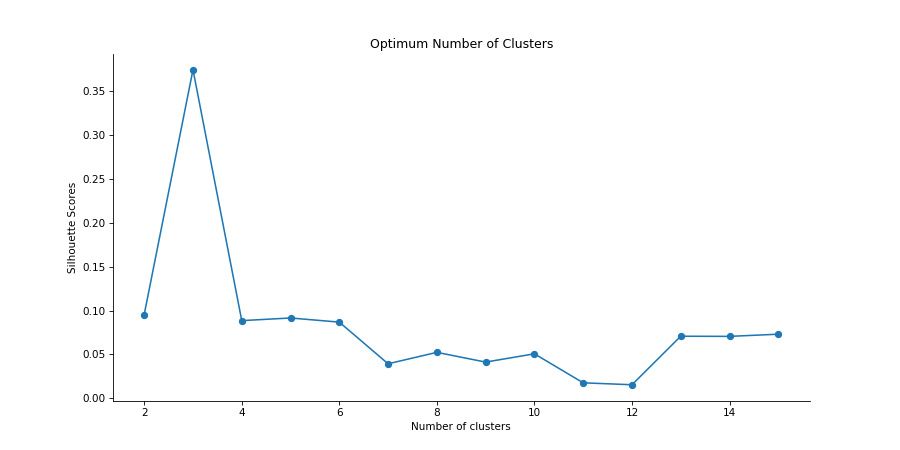

In [56]:
print(scores)
print(kval)
plot(kval, scores)

We will use 3 clusters for our clustering model since it provides the highest silhouette score as seen above.

In [61]:
k = 3

mum_clustering = mum_grouped.drop('Neighborhood', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit(mum_clustering) #Can choose any random_state

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 2], dtype=int32)

Creating a new dataframe that includes cluster labels and the top 10 venues.

In [64]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
mum_merged = df
mum_merged = mum_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
print("done")

done


Let's have alook at the new dataframe

In [63]:
print(mum_merged.shape)
mum_merged

(93, 15)


,Neighborhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Western Suburbs,19.1293,72.8464,1,Indian Restaurant,Pizza Place,Coffee Shop,Sandwich Place,Bar,Asian Restaurant,Bakery,Camera Store,Falafel Restaurant,Snack Place
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623,1,Hotel,Café,Indian Restaurant,Fast Food Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Restaurant,Hotel Bar,Asian Restaurant,Bar
2,D.N. Nagar,Western Suburbs,19.1241,72.8325,1,Bar,Gym / Fitness Center,Pub,Pizza Place,Indian Restaurant,Snack Place,Women's Store,Vegetarian / Vegan Restaurant,Lounge,Market
3,Four Bungalows,Western Suburbs,19.1264,72.8242,1,Indian Restaurant,Chinese Restaurant,Café,Pub,Ice Cream Shop,Bar,Seafood Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Gym / Fitness Center
4,Lokhandwala,Western Suburbs,19.1432,72.8249,1,Indian Restaurant,Chinese Restaurant,Café,Pub,Gym / Fitness Center,Coffee Shop,Fast Food Restaurant,Italian Restaurant,Bar,Lounge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Parel,South Mumbai,18.9957,72.84,1,Indian Restaurant,Coffee Shop,Chinese Restaurant,Pharmacy,Clothing Store,Playground,Plaza,Multicuisine Indian Restaurant,Restaurant,Roof Deck
89,Gowalia Tank,South Mumbai,18.9645,72.8112,1,Indian Restaurant,Café,Bakery,Coffee Shop,Fast Food Restaurant,Snack Place,Chinese Restaurant,Pizza Place,Electronics Store,Salon / Barbershop
90,Dava Bazaar,South Mumbai,19.1314,72.927,0,Train Station,Café,Clothing Store,Food Truck,Beer Garden,Asian Restaurant,Cupcake Shop,Coffee Shop,Fish Market,Falafel Restaurant
91,Dharavi,Mumbai,19.0467,72.8546,1,Indian Restaurant,Fast Food Restaurant,Music Venue,Shoe Store,Seafood Restaurant,Sandwich Place,Lake,Food & Drink Shop,Café,Garden


Visualizing the Cluster by creating a map

In [65]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(mum_merged['Latitude'], mum_merged['Longitude'], mum_merged['Neighborhood'], mum_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

So here is the neighborhoods in each cluster and their top 10 most common venues.

<h2>CLUSTER 1</h2>

In [66]:
mum_merged.loc[mum_merged['Cluster Labels'] == 0, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Nalasopara,Western Suburbs,Multiplex,Pizza Place,Fast Food Restaurant,Ice Cream Shop,Diner,Department Store,Bus Station,Farmers Market,Falafel Restaurant,Factory
36,Bhandup,Eastern Suburbs,Train Station,Fast Food Restaurant,Indian Restaurant,Asian Restaurant,Zoo,Dhaba,Field,Farmers Market,Falafel Restaurant,Factory
40,Kanjurmarg,Eastern Suburbs,Train Station,Chinese Restaurant,Asian Restaurant,Gym,Food Truck,Cupcake Shop,Multiplex,Gift Shop,Diner,Dive Bar
50,Mankhurd,Harbour Suburbs,Bus Station,Coffee Shop,Sports Bar,Train Station,Zoo,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory,Event Space
59,Cotton Green,South Mumbai,Plaza,Train Station,Pizza Place,Multiplex,Ice Cream Shop,Fast Food Restaurant,Falafel Restaurant,Factory,Event Space,Electronics Store
90,Dava Bazaar,South Mumbai,Train Station,Café,Clothing Store,Food Truck,Beer Garden,Asian Restaurant,Cupcake Shop,Coffee Shop,Fish Market,Falafel Restaurant


<h2>CLUSTER 2</h2>

In [67]:
mum_merged.loc[mum_merged['Cluster Labels'] == 1, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Western Suburbs,Indian Restaurant,Pizza Place,Coffee Shop,Sandwich Place,Bar,Asian Restaurant,Bakery,Camera Store,Falafel Restaurant,Snack Place
1,"Chakala, Andheri",Western Suburbs,Hotel,Café,Indian Restaurant,Fast Food Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Restaurant,Hotel Bar,Asian Restaurant,Bar
2,D.N. Nagar,Western Suburbs,Bar,Gym / Fitness Center,Pub,Pizza Place,Indian Restaurant,Snack Place,Women's Store,Vegetarian / Vegan Restaurant,Lounge,Market
3,Four Bungalows,Western Suburbs,Indian Restaurant,Chinese Restaurant,Café,Pub,Ice Cream Shop,Bar,Seafood Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Gym / Fitness Center
4,Lokhandwala,Western Suburbs,Indian Restaurant,Chinese Restaurant,Café,Pub,Gym / Fitness Center,Coffee Shop,Fast Food Restaurant,Italian Restaurant,Bar,Lounge
...,...,...,...,...,...,...,...,...,...,...,...,...
86,Chor Bazaar,South Mumbai,Indian Restaurant,Dessert Shop,BBQ Joint,Bus Station,Ice Cream Shop,Rest Area,Restaurant,Food,Middle Eastern Restaurant,Chinese Restaurant
87,Matunga,South Mumbai,Indian Restaurant,Fast Food Restaurant,Café,Snack Place,Ice Cream Shop,Chinese Restaurant,South Indian Restaurant,Vegetarian / Vegan Restaurant,Train Station,Coffee Shop
88,Parel,South Mumbai,Indian Restaurant,Coffee Shop,Chinese Restaurant,Pharmacy,Clothing Store,Playground,Plaza,Multicuisine Indian Restaurant,Restaurant,Roof Deck
89,Gowalia Tank,South Mumbai,Indian Restaurant,Café,Bakery,Coffee Shop,Fast Food Restaurant,Snack Place,Chinese Restaurant,Pizza Place,Electronics Store,Salon / Barbershop


<h2>CLUSTER 3</h2>

In [68]:
mum_merged.loc[mum_merged['Cluster Labels'] == 2, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
92,Thane,Mumbai,Pizza Place,Performing Arts Venue,Dessert Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory,Event Space,Electronics Store,Donut Shop


<h2>Let's DIscuss the Results</h2>

By analyzing the three clusters obtained we can see that some of the clusters are more Cafe, whereas, other clusters are less suited. Neighborhoods in clusters 1 and 3 contain a small percentage of restaurants, hotels, cafe and pubs in their top 10 common venues. These clusters contain a higher degree of other venues like train station, bus station, fish market, gym, performing arts venue and smoke shop, to name a few. Thus, they are not well suited for opening a new cafe. On the other hand, neighborhoods in cluster 2 contain a much higher degree of restaurants, hotels, multiplex, cafes, bars and other food joints. Thus, the neighborhoods in this clusters would be well suited for opening a new restaurant.

 Most neighborhoods in cluster 2 seem to have Cafe as their top most common venue; however, on careful analysis we can see that neighborhoods in cluster 2 also contain other venues like soccer field, flea market, smoke shop, gym, train station, dance studio, music store, cosmetics shop and so on. Thus, it is recommended that the new Cafe can be opened in the neighborhoods belonging to cluster 2. This neighborhood can be further plotted on a map as shown below.

In [69]:
new_restaurant_neighborhoods = mum_merged.loc[mum_merged['Cluster Labels'] == 1, mum_merged.columns[[0, 1, 2, 3] + list(range(5, mum_merged.shape[1]))]]
new_restaurant_neighborhoods.head()

,Neighborhood,Location,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Western Suburbs,19.1293,72.8464,Indian Restaurant,Pizza Place,Coffee Shop,Sandwich Place,Bar,Asian Restaurant,Bakery,Camera Store,Falafel Restaurant,Snack Place
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623,Hotel,Café,Indian Restaurant,Fast Food Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Restaurant,Hotel Bar,Asian Restaurant,Bar
2,D.N. Nagar,Western Suburbs,19.1241,72.8325,Bar,Gym / Fitness Center,Pub,Pizza Place,Indian Restaurant,Snack Place,Women's Store,Vegetarian / Vegan Restaurant,Lounge,Market
3,Four Bungalows,Western Suburbs,19.1264,72.8242,Indian Restaurant,Chinese Restaurant,Café,Pub,Ice Cream Shop,Bar,Seafood Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Gym / Fitness Center
4,Lokhandwala,Western Suburbs,19.1432,72.8249,Indian Restaurant,Chinese Restaurant,Café,Pub,Gym / Fitness Center,Coffee Shop,Fast Food Restaurant,Italian Restaurant,Bar,Lounge


In [75]:
map_res_locations = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, location, neighborhood in zip(new_restaurant_neighborhoods['Latitude'], new_restaurant_neighborhoods['Longitude'],
                                            new_restaurant_neighborhoods['Location'], new_restaurant_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    folium.Marker([lat, lng], popup='{} has geographical coordinates ({:.4f}, {:.4f})'.format(label, lat, lng),
                  icon=folium.Icon(color='darkgreen'), tooltip=label).add_to(map_res_locations)
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='black',
        fill_opacity=0.7,
        parse_html=False).add_to(map_res_locations) 

map_res_locations

<h2>Conclusion</h2>

Successfully analyzed the neighborhoods in Mumbai, India for determining which would be the best neighborhoods for opening a Cafe. Based on our analysis, neighborhoods in cluster 2 are recommended as locations for the new cafe. This has also been plotted in the map above. The stakeholders and investors can further tune this by considering various other factors like transport, legal requirements, and costs associated.